In [11]:
# General imports
import numpy as np
import sys
basepath = "../"
sys.path.insert(0, basepath)

In [5]:
# Stuff for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.size"]=18
mpl.rcParams["font.family"]="sans-serif"
mpl.rcParams["text.usetex"]=True
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [6]:
#  Load the 5BZCat catalog
from lib.data import load_5bzcat, catbins, load_hotspots
dpath = "/Users/chiarabellenghi/PointSource/blazar_hotspots_correlation/data/"

cat = load_5bzcat(dpath)

# Load the hotspot list
hotspots = load_hotspots(dpath, hemisphere='south')

Load 5bzcat.csv
	Found 3469 sources


In [7]:
# Import stuff for the correlation analysis
from lib.correlation import Correlator, EventSample

In [8]:
# Define that hypothese to test in terms of minimum pValue threshold and association radius
# Here we test the same hypotheses that are tested in Sara Buson et al 2022 ApJL 933 L43
sigmas = np.linspace(0.4, 0.7, 7)
pVal_thrs = np.linspace(3.5, 4.5, 3)

In [9]:
# Initialize the Correlator object and the sample of hotspots to analyse.
# Note that catbins is useless for our analysis but the framework still requires it.
C = Correlator(cat, bins=catbins[-1], dec_range=(np.radians(-85),np.radians(-5)), mlat=np.radians(10))
hs_sample = EventSample(hotspots)

# Loop over all the hypotheses for the analysis.
fract_associated = {}
for thr in sorted(pVal_thrs):
    C.add_primary('hotspots', hs_sample)
    C.logpVal_thr = thr
    fract_associated[thr] = []
    for sigma in sigmas:
        print("-------------------------------------------------")
        print(f"Analysis parameters: L_min = {thr}, r_assoc = {sigma:.2f}°")
        print("-------------------------------------------------")
        
        hs_sample.add_sigma_field(np.radians(sigma))
        
        print("*******************************************************************")
        print(
            "Fraction of hotspots having at least one counterpart in the 5BZCat: "
            f"{C()[0]}/{C.primaries['hotspots'].N}"
        )
        
        hotspots_mask, counterparts_mask = C.get_counterparts(catbins[-1])
        fract_associated[thr].append(C()[0]/C.primaries['hotspots'].N * 100)
        
        print()
        print()

- Setting galactic plane width to 10.0deg
Catalogue: 3469 sources
Applying cuts to the source catalogue:
	Sources in declination range: [-85.  -5.] degrees: 1214.
	Applying galactic plane cut...
	After galactic plane cut: 1177
	1177 sources above 0.00 (100.00%)
Remove sources that are in no bin:   0.00%
Analysis - Initialize with random seed
Applying cuts to the event sample:
	Events in [-85.  -5.] degrees: 926
	Applying galactic plane cut...
	After galactic plane cut: 774
After the cut(s), 774 hotspots will be analysed.
	Applying the pvalue threshold cut...
	Spots with -log10p > 3.5: 44
After the cut(s), 44 hotspots will be analysed.
-------------------------------------------------
Analysis parameters: L_min = 3.5, r_assoc = 0.40°
-------------------------------------------------
*******************************************************************
Fraction of hotspots having at least one counterpart in the 5BZCat: 5/44
hotspots: 5 counterparts above [0]
	R.A.[deg]  -  Dec.[deg]  -  HS

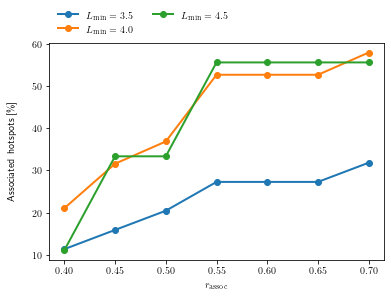

In [10]:
for thr in sorted(pVal_thrs):
    plt.errorbar(sigmas, fract_associated[thr], fmt="o", lw=2, ls="-", label=f"$L_{{\mathrm{{min}}}}={thr}$")

plt.xlabel("$r_{\mathrm{assoc}}$")
plt.ylabel("Associated hotspots [\%]", labelpad=15)
plt.legend(ncol=2, frameon=False, loc='lower left', bbox_to_anchor=(0.0,1.))